# Lab Assignment One: Exploring Table Data

Gabs DiLiegro, London Kasper, Carys LeKander

# 1. Business Understanding

Housing prices are a large topic of interest for many people around the world. A person's home and environment can greatly affect their life and mental state. Being able to predict housing costs could help buyers and sellers in the housing market as people looking to buy a house could use this model to see what factors drive prices up and be able to stay in their price range and sellers could get an accurate estimate of how much their home is worth. 

Our dataset is centered around housing in neighborhoods around Melbourne, Australia. This data was collected from public records posted on Domain.com.au, and the prediction task associated with this dataset is the price of the housing. This dataset has 13580 entries with 21 attributes for each observation. The data appeared to be ordered by the Suburb attribute in alphabetical order. We found this dataset at kaggle.com. 

With our visualizations and analysis, we are able to show the most important factors in determining the price of a house and eventually will be able to predict the price based on these factors. 

We believe that the accuracy of our model would need to be a high percentage to be accepted by users because there are many algorithms about predicting housing prices that currently exist with high accuracy. When looking online, we found multiple tools built to forecast prices of homes (ex. VeroFORECAST) and research papers about machine learning for predicitng housing costs (ex. one we found claims 86% accuracy). 

Dataset: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

******************************************************

VeroFORCAST: https://www.veros.com/solutions/home-price-trends-and-forecast/veroforecast

Reasearch paper example: https://www.ijert.org/comparison-of-machine-learning-algorithms-for-house-price-prediction-using-real-time-data


# 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import warnings
import missingno as mn
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

df = pd.read_csv('melb_data.csv')

df.head(5) 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [2]:
df.tail() #Showing the raw dataset's ordering alphabetically by Suburb 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [3]:
#find data types and missing data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Data Quality Check

In [5]:
#checking for duplicated data
idx = df.duplicated()
print(len(df[idx])==0)

True


We found no duplicated data in our dataset as shown above. 

Text(0.5, 1.0, 'Nullity Matrix')

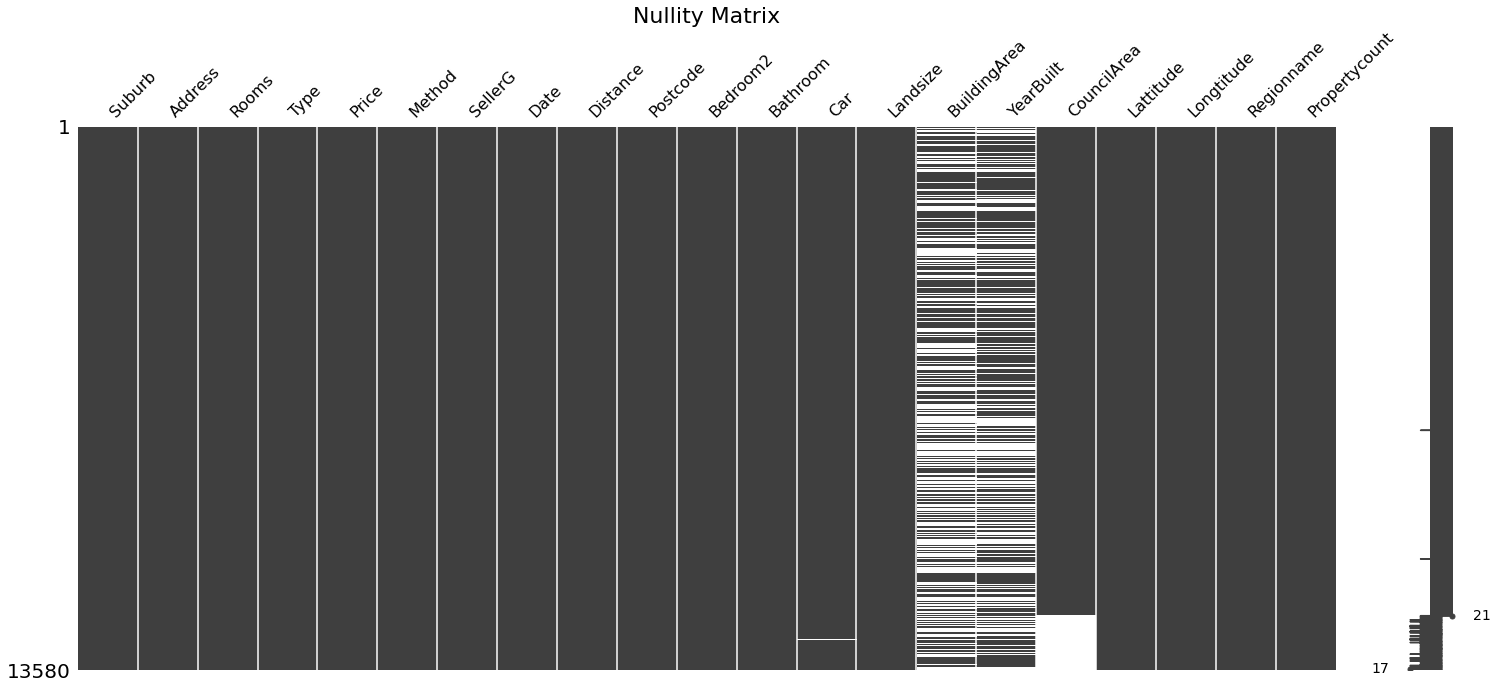

In [6]:
mn.matrix(df)
plt.title("Nullity Matrix",fontsize=22)

This graph displays all of the variables and which instances (as marked on the far left) have null attributes. The dataset is mostly non-null values, but the attributes BuildingArea, CouncilArea and YearBuilt appear to have quite a bit of missing information.
<br><br>One particularly interesting thing to note is that the information for the CouncilArea attribute is fully null after a specific number of observations-- perhaps due to the way of collecting the information? This doesn't necessarily have to be the case as there is no reason that all of the observations would be in order by date. Let's change that and see what happens.


In [7]:
from datetime import date
from datetime import datetime
#time = datetime.min.time() #no time data provided, default is 00:00:00
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df = df.sort_values(by='Date')
df['Date'].describe #The Date column has been changed to a datetime64 data type and we can now see the range of our values!

<bound method NDFrame.describe of 6184    2016-01-28
6183    2016-01-28
4029    2016-02-04
7168    2016-02-04
4709    2016-02-04
           ...    
13244   2017-09-23
13243   2017-09-23
13242   2017-09-23
13240   2017-09-23
13119   2017-09-23
Name: Date, Length: 13580, dtype: datetime64[ns]>

Text(0.5, 1.0, 'Sorted by Date')

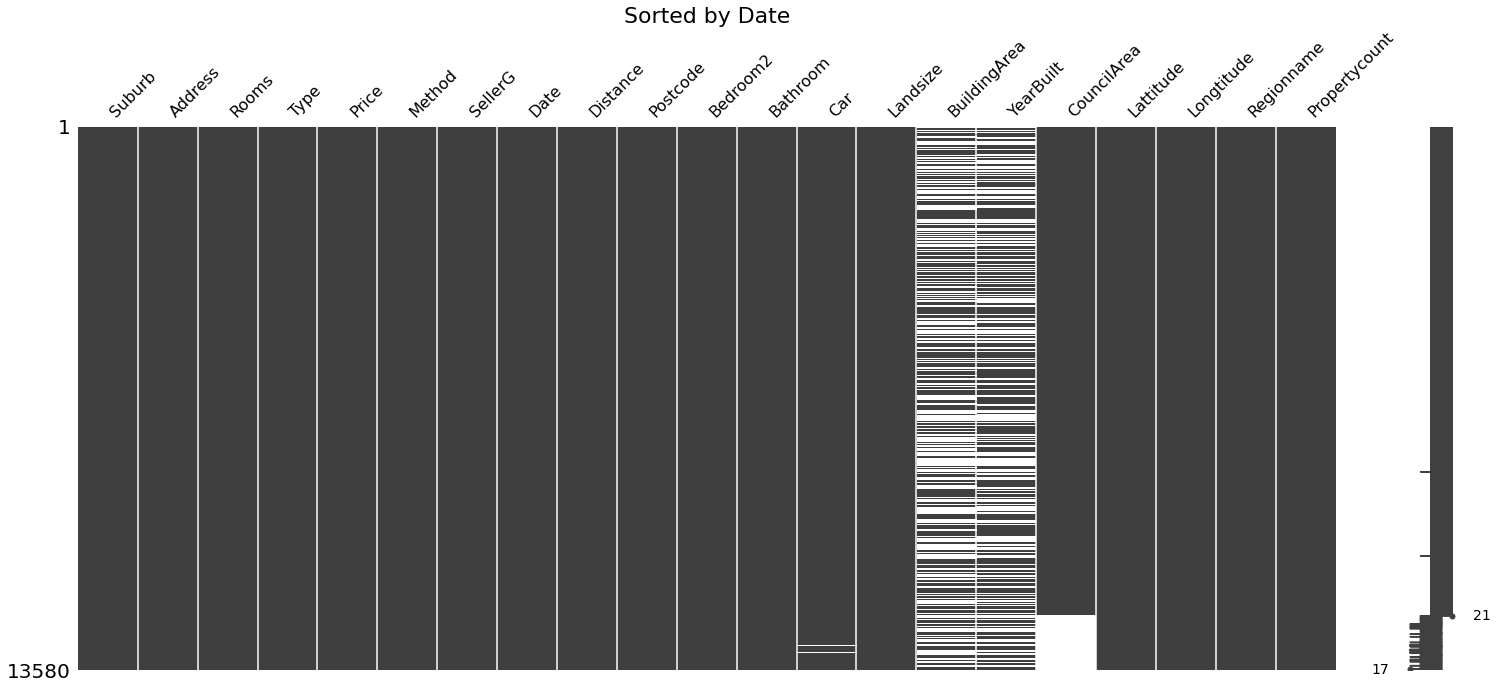

In [8]:
mn.matrix(df)
plt.title("Sorted by Date",fontsize=22)

This looks almost exactly like the last nullity matrix, except there are a few subtle changes in the line patterns for BuildingArea and YearBuilt. We can also visually see that there is actually more than 1 null value for the Car attribute, and that they were recorded at different times. However, we were correct in assuming that the CouncilArea data stopped being recorded at some point in time. This lack of information would be problematic except that the CouncilArea is likely determined by other information that we do have, such as Postcode, Suburb, or the Regionname. We will handle this in the future. For now, we have determined that the Address, SellerG, Date and Propertycount attributes are unnecessary to the task at hand, so we can remove the information from our dataframe. 

In [9]:
# removing irrelevant columns 
df = df.drop(['Address','Method','SellerG', 'Date','Bedroom2', 'Propertycount','BuildingArea', 'YearBuilt','CouncilArea','Lattitude','Longtitude'], axis=1)

# Data Dictionary 
### Attributes used for visualizations
- Suburb: the name of the suburb that each property is in. (String object)
- Rooms: the total number of rooms for each property. (int64)
- Type: the type of property. (String object: br = bedrooms; h = house/cottage/villa/seni/terrace; u = unit, duplex; t = townhouse; dev site = development site; ores = other residential)
- Price: listing price in Australian dollars (float64)
- Distance: the distance from the property to the Melbourne central business district AKA CBD (float64)
- Postcode: zipcode the property falls within (float64) 
- Bathroom: the number of bathrooms (float64)
- Car: the number of parking spots (float64)
- Landsize: the size of the land in meters (float64)
- Regionname: general region of the property (String object)

### Attributes removed from final visualizations  and why:<br>
# Data Dictionary 
### Attributes used for visualizations
- Suburb: the name of the suburb that each property is in. (String object)
- Rooms: the total number of rooms for each property. (int64)
- Type: the type of property. (String object: br = bedrooms; h = house/cottage/villa/seni/terrace; u = unit, duplex; t = townhouse; dev site = development site; ores = other residential)
- Price: listing price in Australian dollars (float64)
- Method: way the property was listed
- Distance: the distance from the property to the Melbourne central business district AKA CBD (float64)
- Postcode: zipcode the property falls within (float64) 
- Bedroom2: the number of bedrooms (float64: scraped from a different source)
- Bathroom: the number of bathrooms (float64)
- Car: the number of parking spots (float64)
- Landsize: the size of the land in meters (float64)
- Regionname: general region of the property (String object)

### Attributes removed from final visualizations  and why:
- Address: the address of the property (String object)
- Method: way the property was listed
     - We aren't considering data about how the house was sold, just the features of the house itself, which is why we also excluded SellerG and Date
- SellerG: name of the real estate agent listing the property (String object)
- Date: sale date in mm/dd/yyyy (float64)
- Bedroom2: the number of bedrooms (float64: scraped from a different source)
    - Rooms and Bedroom2 contain the same information collected from different sources. We have seen that these features are very strongly correlated and have very similar data, so we are excluding Bedroom2 for simplicity.
- Propertycount: number of properties in the same suburb (float64)
- BuildingArea: area of the building in meters
    - Since ~47% of the dataset is missing this we decided to remove it
- YearBuilt: year the house was built (float64)
    - Although we think YearBuilt could have useful infomation for our model, ~40% of the data is missing so we have decided to remove it
- CouncilArea: the governing council for the area (String object)
    - As we showed above, the CouncilArea stopped being recorded after a certain date. Therefore we decided to remove this attribute as we did not want it to skew our set
- Latitude: lattitude of property (float64)
- Longitude: longtitude of property (float64)
    - Niether Longitude or Latitude supply us with more useful information than other data we have collected about the area of the houses

There are quite a few variables that are categorical, but aren't classified as such. We will change them to a pandas 'category' data type.

In [10]:
df['Suburb'] = pd.Categorical(df.Suburb)
df['Type'] = pd.Categorical(df.Type)
df['Postcode'] = pd.Categorical(df.Postcode)
df['Regionname'] = pd.Categorical(df.Regionname)

#fill in missing numeric values with median for Car
df = df.fillna(df.median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13580 entries, 6184 to 13119
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Suburb      13580 non-null  category
 1   Rooms       13580 non-null  int64   
 2   Type        13580 non-null  category
 3   Price       13580 non-null  float64 
 4   Distance    13580 non-null  float64 
 5   Postcode    13580 non-null  category
 6   Bathroom    13580 non-null  float64 
 7   Car         13580 non-null  float64 
 8   Landsize    13580 non-null  float64 
 9   Regionname  13580 non-null  category
dtypes: category(4), float64(5), int64(1)
memory usage: 842.9 KB


# 3. Data Visualization

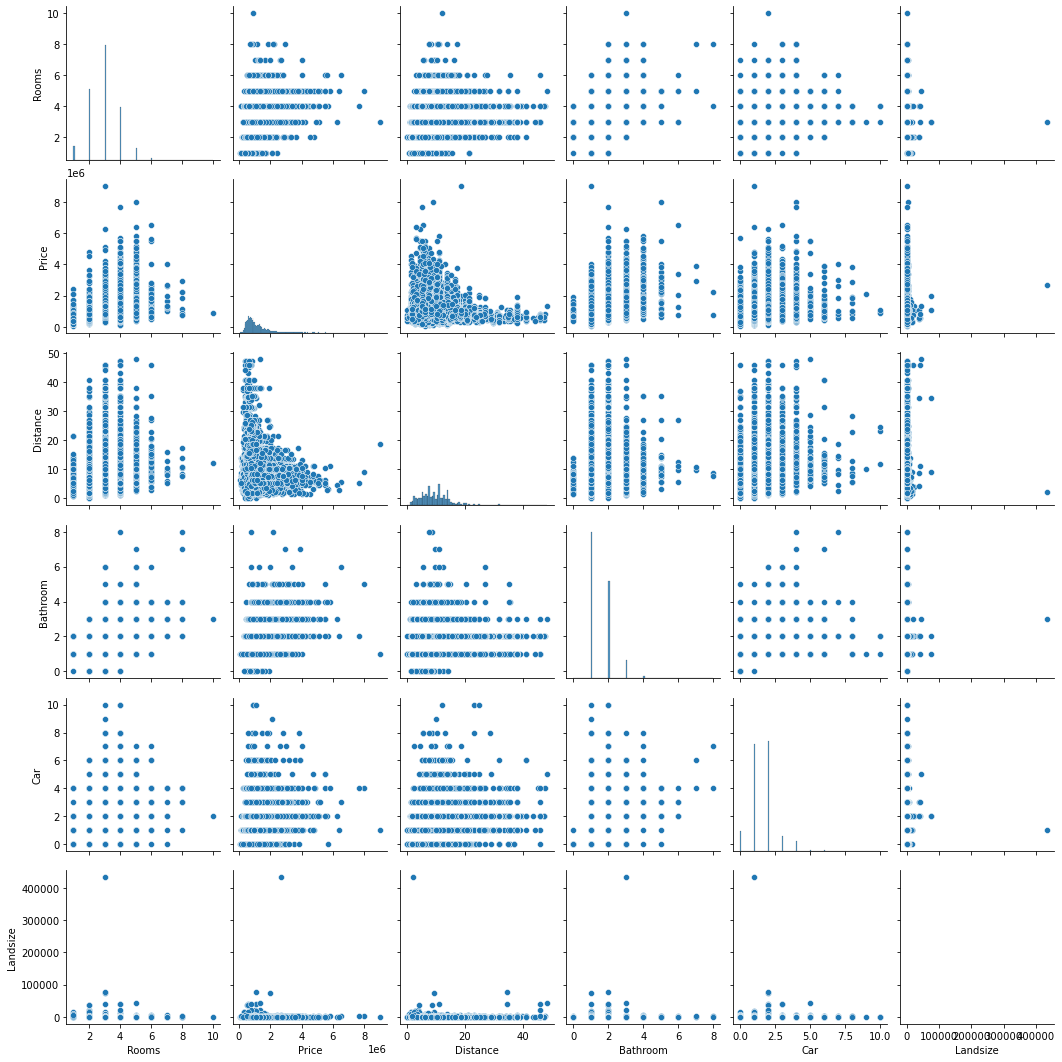

In [11]:
sns.pairplot(df)

This pairplot serves to point out some unexpected relationships in our data at a glance.

In [12]:
df['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

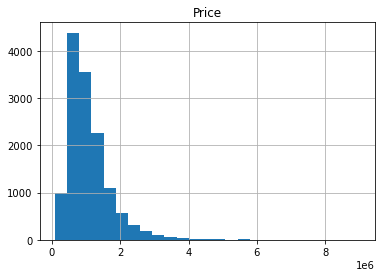

In [13]:
df.hist('Price', bins = 25)

Here, we can see the range of the prices for the houses. Most of the houses are concentrated between 0-2,000,000 but the distribution is skewed to the right, with some houses exceeding 8,000,000.

<Figure size 1440x1080 with 0 Axes>

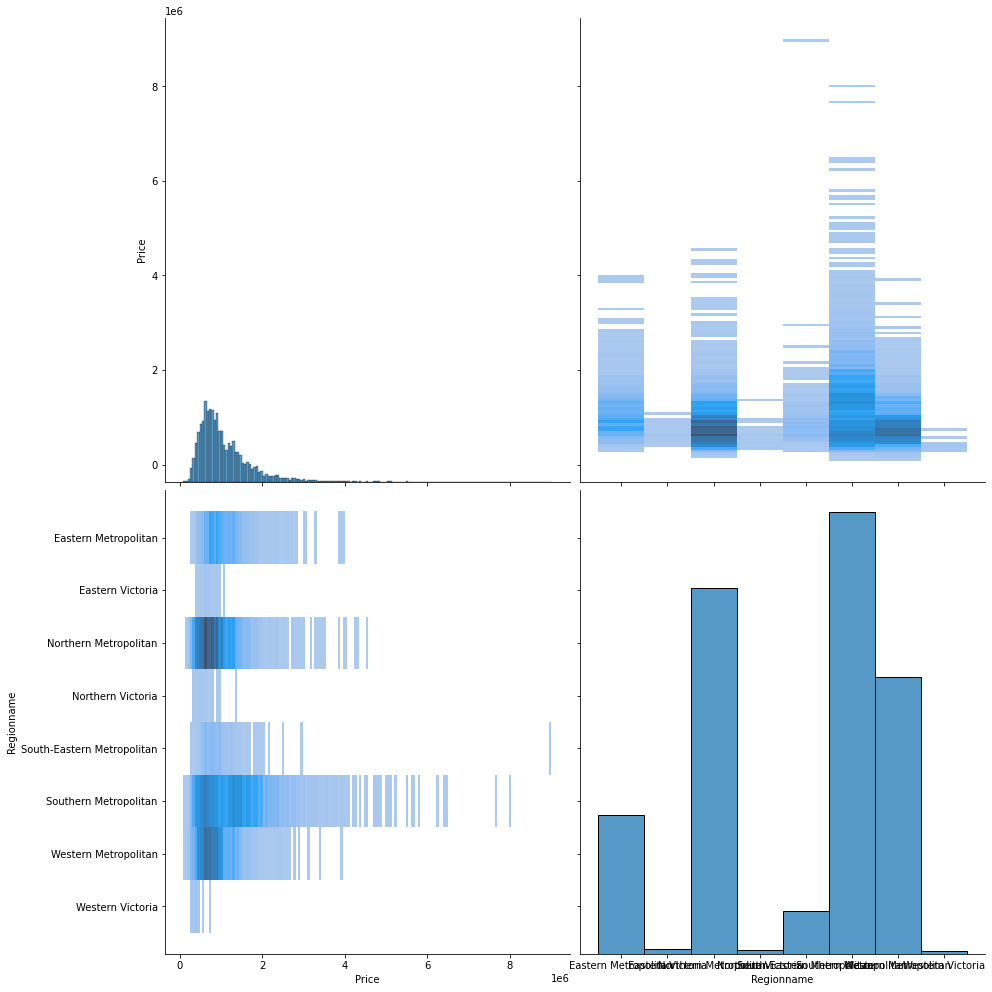

In [14]:
plt.figure(figsize = (20,15))
sns.pairplot(df, vars=['Price', 'Regionname'], height=7,  aspect =1, kind="hist")

This pair plot shows the regions and their prices. Immediately we see a smaller distribution of prices in Western, Nothern, and Eastern Victoria, while the other regions have wider distributions. We can also see that the more expensive houses are in the Metropolitan regions.

<AxesSubplot:xlabel='Bathroom', ylabel='Rooms'>

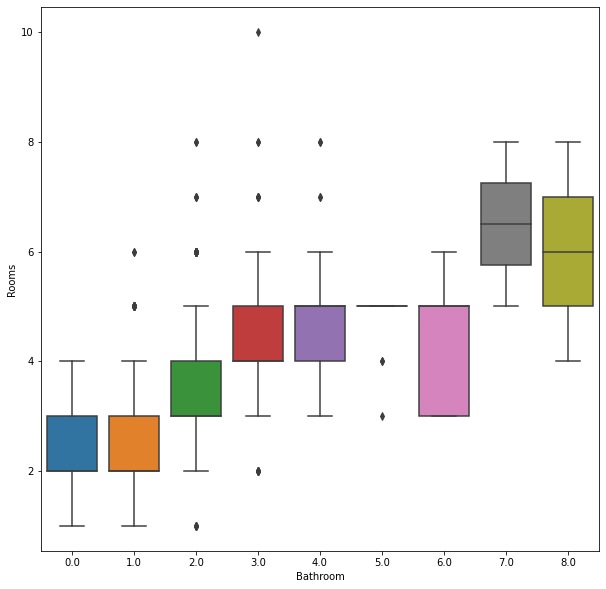

In [15]:
plt.figure(figsize = (10,10))
sns.boxplot(data=df,x = 'Bathroom', y = 'Rooms')

These box plots show the number of bathrooms and rooms in each house. As the number of bathrooms increases, the number of rooms also tends to increase. However, there are some houses with more rooms but less bathrooms. We can also see a very narrow distribution 

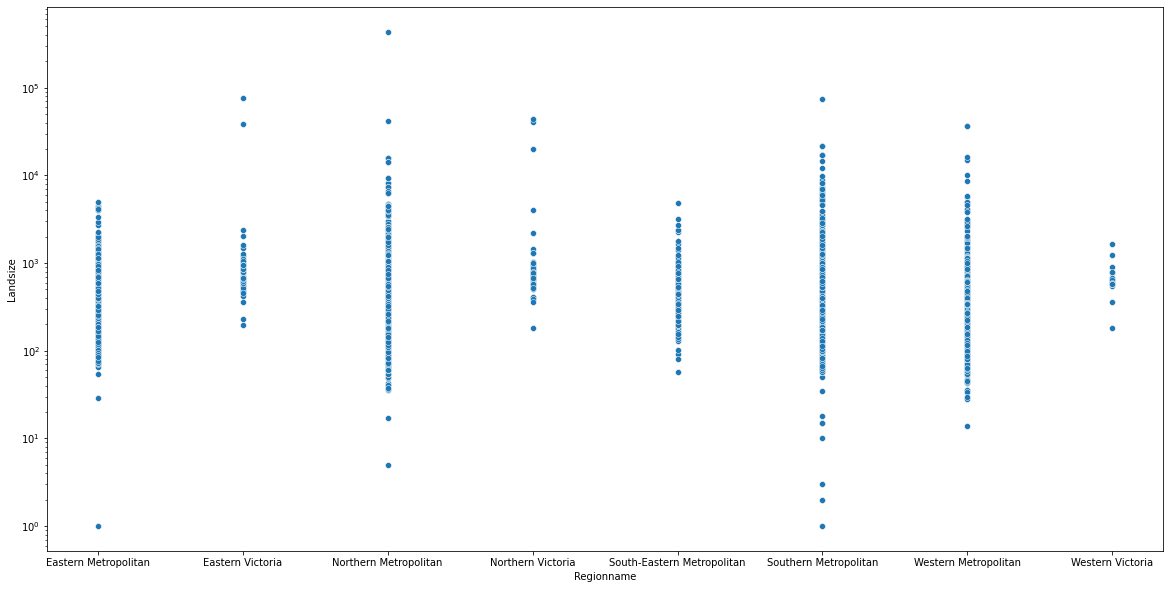

In [16]:
plt.figure(figsize=(20, 10))
tempPlt = sns.scatterplot(x="Regionname", y="Landsize", data=df)
tempPlt.set_yscale('log')

We wanted to see the landsize of houses by the region they were in, so we plotted them in a scatterplot. We saw that Southern Metropolitan includes some of the smallest and largest houses. Eastern and South-Eastern Metropolitan both have a tighter distribution as compared to the other regions. The Victoria region houses have a distribution that sits relatively high as compared to the other regions.

## Question 1: What is the most important feature in determining the price of a house?

To start to answer this question, we made a correlation matrix with usable attributes.

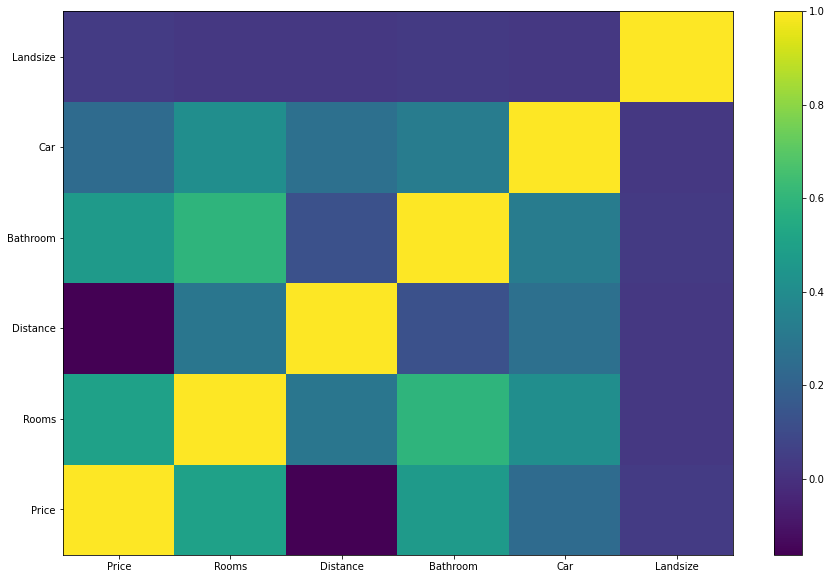

In [17]:
#correlation matrix
vars_to_use = ['Price', 'Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize']
plt.figure(figsize=(15, 10))
plt.pcolor(df[vars_to_use].corr()) 
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()

plt.show()

From the correlation matrix, we can see that the number of rooms and bathrooms are highly correlated with price, number of parking spots has a low positive correlation with price, distance from CBD is negatively correlated, and the landsize seems to be uncorrelated with any attribute.

We can start by looking closer at how the car spots contributes to the price.

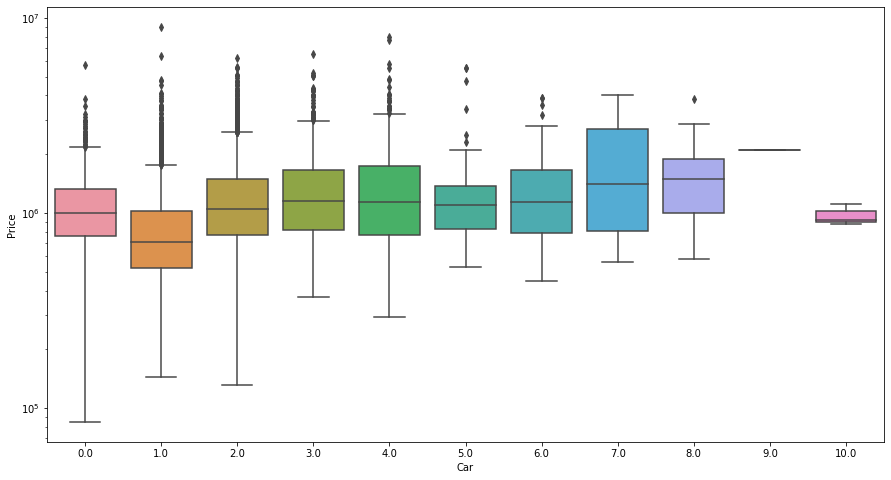

In [18]:
plt.figure(figsize = (15,8))
tempPlt = sns.boxplot(data = df, x = 'Car', y = 'Price')
tempPlt.set_yscale('log')

From the figure above, we see that the median price is very similar as the number of car spots increase. Therefore, the car spots is not signficantly important in determining the price of a home for this dataset.

Next, we consider the land size which is measured in square meters. To visualize this data, we separated the data into four sections with equal amounts of homes based on the 25%, 50%, and 75% ranges we found when looking at the information on the dataset for Landsize. 

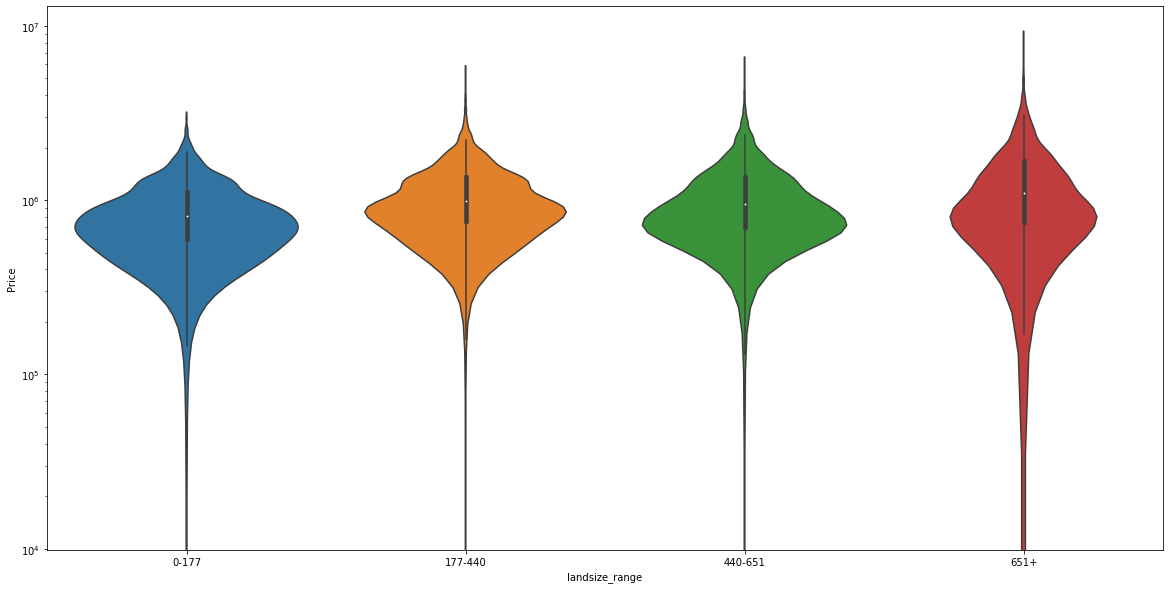

In [19]:
df['landsize_range'] = pd.cut(df['Landsize'], [0,177,440,651,1e6], labels=['0-177','177-440','440-651','651+']) 
plt.figure(figsize=(20, 10))
tempPlt = sns.violinplot(x="landsize_range", y="Price", data=df)
tempPlt.set_yscale('log')

From the violin plot above, we can see that is each range looks very similar in terms of their interquartile range and the distribution in prices. This confirms that the landsize does not have much impact on the price.

Then, we consider the distance to the CBD from the home. We separated the data into four sections similar to the previous plot and used a box plot to visualze. 

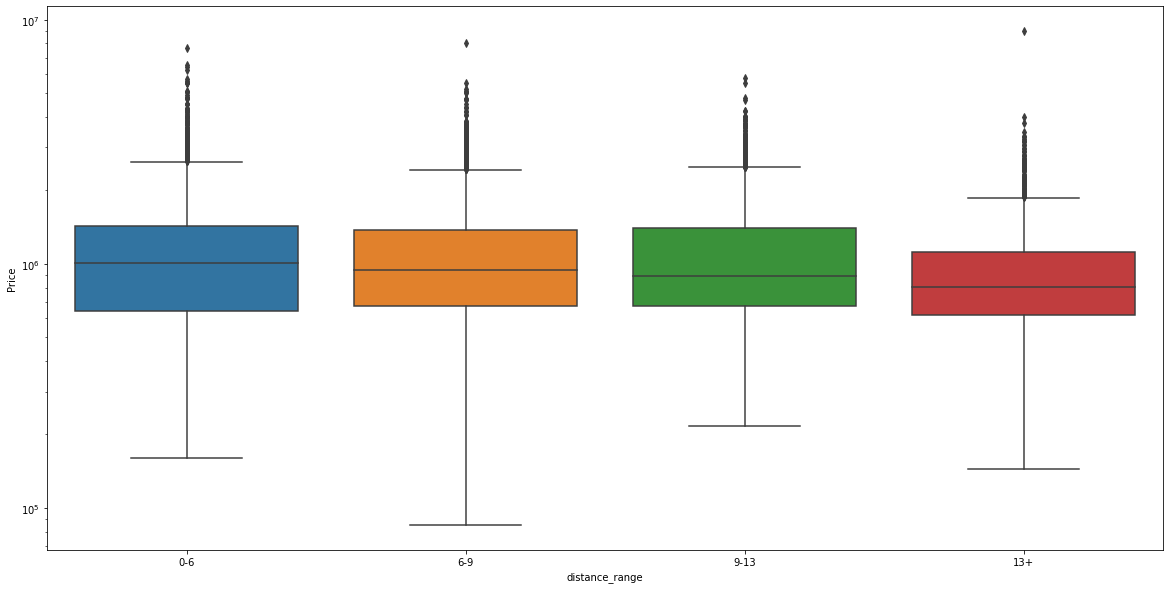

In [20]:
df['distance_range'] = pd.cut(df['Distance'], [0,6,9,13,100],labels=['0-6','6-9','9-13','13+']) 

plt.figure(figsize=(20, 10))
tempPlt = sns.boxplot(x="distance_range", y="Price", data=df)
tempPlt.set_yscale('log')

The correlation matrix showed us that there was a small negative correlation between the distance from the CBD and the price of a home. This plot confirms that, but also shows that the price range does not decrease much over the ranges. Therefore, distance also does not impact price significantly. 

Next, we look at regions which we were not able to visualize in our correlation matrix. 

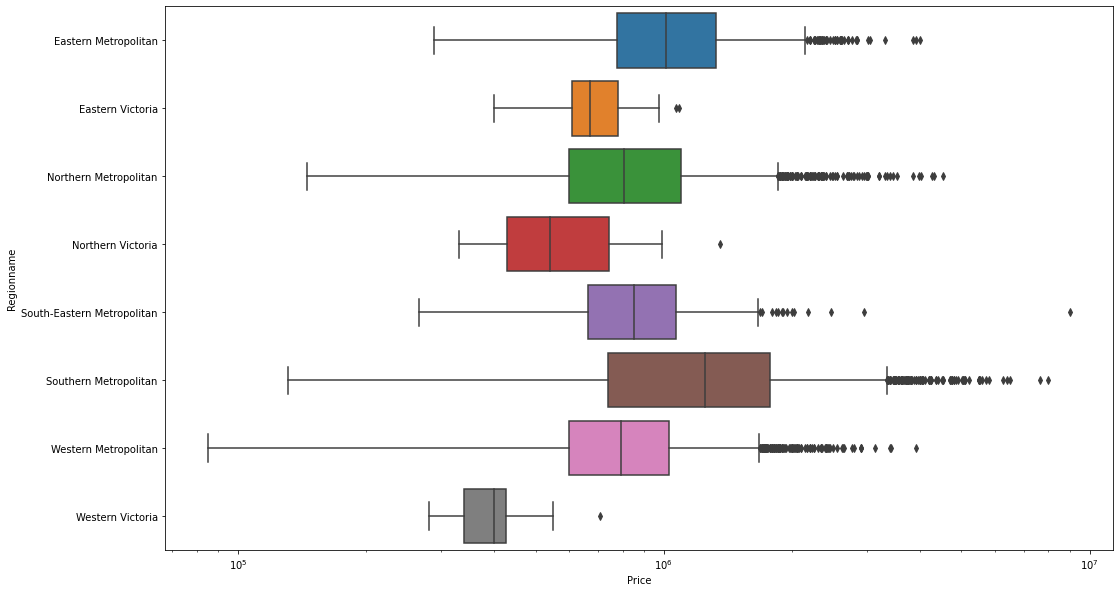

In [21]:
plt.figure(figsize = (17,10))
tempPlt = sns.boxplot(data=df,x = 'Price', y = 'Regionname')
tempPlt.set_xscale('log')

We can see from this plot that the regions have varying distributions so it is likely a factor in the price. We will explore more into the impact of regions in Question 3.

Next, we look at the number of rooms and bathrooms which both were strongly correlated with price. 

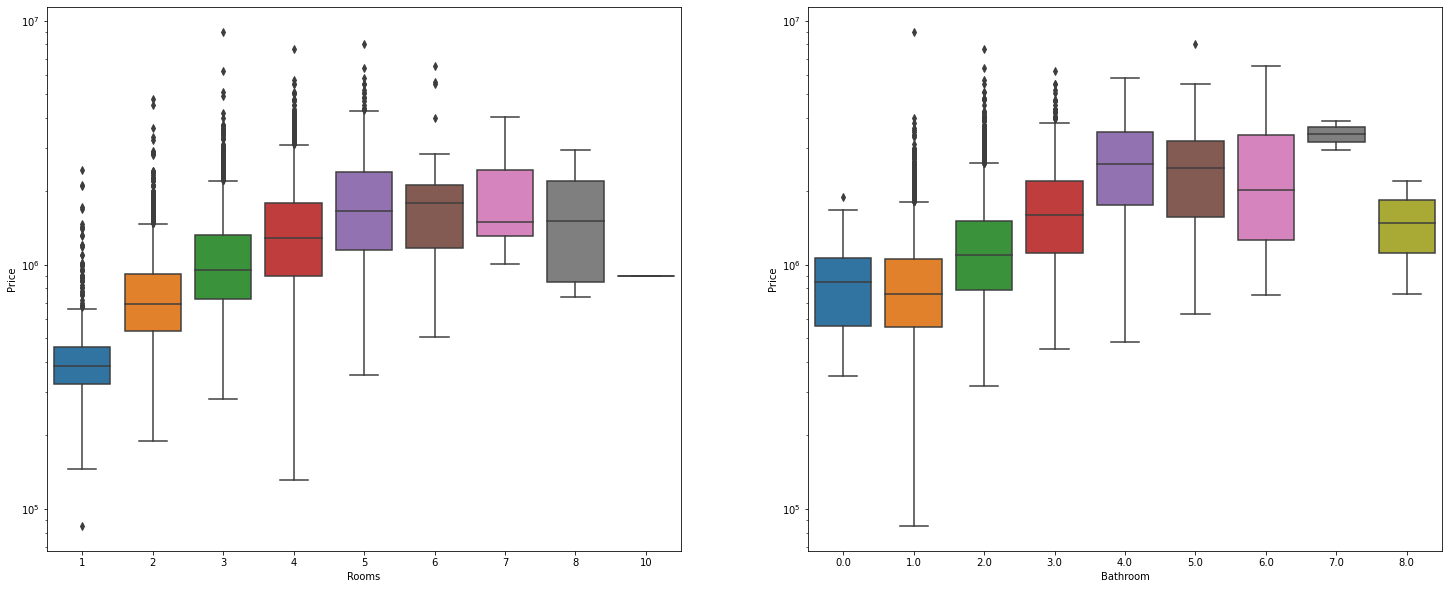

In [22]:
plt.figure(figsize = (25,10))

plt.subplot(1,2,1)
tempPlt = sns.boxplot(data=df,x = 'Rooms', y = 'Price')
tempPlt.set_yscale('log')

plt.subplot(1,2,2)
tempPlt = sns.boxplot(data=df,x = 'Bathroom', y = 'Price')
tempPlt.set_yscale('log')

From the room plot, we see a steady increase in the interquartile range of prices as the number of rooms increase in a home. Looking at the bathrooms on the right, overall there is also an increase in the range as the number of bathrooms increase, but it is not as consistent as rooms. There are many outliers showing us that the amount of rooms is defintely not the only factor that contributes to the price of the homes, but from our visualizations we think it is the most impactful for this dataset. 

## Question 2: Which postcodes have the most expensive of each type of property? Which have the least expensive?
In order to answer this question, we must group our data first by Type. There are three types of properties represented in our dataset:<br> h = house/cottage/villa/seni/terrace<br>u = unit, duplex <br>t = townhouse


In [23]:
n = len(pd.unique(df['Postcode']))
print("Number of unique postcode values:",n)

Number of unique postcode values: 198


In [24]:
groupType = df.groupby('Type')
groupType.first() # We see the first entry in each type now that our data is separated into groups

,Suburb,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Regionname,landsize_range,distance_range
Type,,,,,,,,,,,
h,Surrey Hills,3,1205000.0,11.2,3127.0,1.0,2.0,490.0,Southern Metropolitan,440-651,9-13
t,Maribyrnong,3,560000.0,8.7,3032.0,2.0,2.0,83.0,Western Metropolitan,0-177,6-9
u,Surrey Hills,2,813000.0,11.2,3127.0,1.0,2.0,108.0,Southern Metropolitan,0-177,9-13


In [25]:
groupType.get_group('h').Price.mean() #We can now perform operations on each group by itself!

1242664.761138745

From here we can sort each individual type by price to find the maximum and minimum.

In [26]:
maxPriceByType = groupType.Price.idxmax()
minPriceByType = groupType.Price.idxmin()
print(maxPriceByType.head()) #The values displayed for each type are the corresponding ID of the row in the original dataset
print(minPriceByType.head())

Type
h    12094
t     8374
u      233
Name: Price, dtype: int64
Type
h    1805
t    7288
u    2652
Name: Price, dtype: int64


In [27]:
print("\nEntry with maximum price for each type:\n")
for x in range(maxPriceByType.size):
    print(df.loc[[maxPriceByType[x]]], "\n")
    
print("\n\n\nEntry with minimum price for each type:\n")
for y in range(minPriceByType.size):
    print(df.loc[[minPriceByType[y]]])


Entry with maximum price for each type:

         Suburb  Rooms Type      Price  Distance Postcode  Bathroom  Car  \
12094  Mulgrave      3    h  9000000.0      18.8   3170.0       1.0  1.0   

       Landsize                  Regionname landsize_range distance_range  
12094     744.0  South-Eastern Metropolitan           651+            13+   

           Suburb  Rooms Type      Price  Distance Postcode  Bathroom  Car  \
8374  South Yarra      3    t  3475000.0       3.3   3141.0       3.0  1.0   

      Landsize             Regionname landsize_range distance_range  
8374     296.0  Southern Metropolitan        177-440            0-6   

       Suburb  Rooms Type      Price  Distance Postcode  Bathroom  Car  \
233  Armadale      2    u  3625000.0       6.3   3143.0       2.0  2.0   

     Landsize             Regionname landsize_range distance_range  
233       0.0  Southern Metropolitan            NaN            6-9   




Entry with minimum price for each type:

         Suburb  Ro

We can see the specific information we wanted above by looking at the maximum and minimum data separately: for the maximum prices, the most expensive house (h) was found in the postcode 3170. The most expensive unit/duplex (u) was found in the postcode 3143, and the most expensive townhouse (t) was found in the postcode 3141. We can also view the prices above, or below in the table. The same information can be found above in the minimum price section or below by postcode.

In [28]:
tempdf = pd.DataFrame(df[df.index.isin(maxPriceByType)])
tempdf2 = pd.DataFrame(df[df.index.isin(minPriceByType)])
fullData = pd.concat([tempdf, tempdf2])
fullData.head(6)

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,Landsize,Regionname,landsize_range,distance_range
233,Armadale,2,u,3625000.0,6.3,3143.0,2.0,2.0,0.0,Southern Metropolitan,NaN,6-9
8374,South Yarra,3,t,3475000.0,3.3,3141.0,3.0,1.0,296.0,Southern Metropolitan,177-440,0-6
12094,Mulgrave,3,h,9000000.0,18.8,3170.0,1.0,1.0,744.0,South-Eastern Metropolitan,651+,13+
2652,Footscray,1,u,85000.0,6.4,3011.0,1.0,0.0,0.0,Western Metropolitan,NaN,6-9
7288,Albion,2,t,300000.0,13.9,3020.0,1.0,1.0,74.0,Western Metropolitan,0-177,13+
1805,Caulfield,4,h,131000.0,8.9,3162.0,1.0,2.0,499.0,Southern Metropolitan,440-651,6-9


In [29]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 233 to 1805
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Suburb          6 non-null      category
 1   Rooms           6 non-null      int64   
 2   Type            6 non-null      category
 3   Price           6 non-null      float64 
 4   Distance        6 non-null      float64 
 5   Postcode        6 non-null      category
 6   Bathroom        6 non-null      float64 
 7   Car             6 non-null      float64 
 8   Landsize        6 non-null      float64 
 9   Regionname      6 non-null      category
 10  landsize_range  4 non-null      category
 11  distance_range  6 non-null      category
dtypes: category(6), float64(5), int64(1)
memory usage: 21.5 KB


We now have enough data organized to plot the information we're looking for. We can see the specific postcodes in the outputs above, but it'll still be interesting to see if there appears to be any relationship. <br><br>First, let's take a look into what the data looked like before we isolated the min/max prices for each type.

<AxesSubplot:xlabel='Postcode', ylabel='Price'>

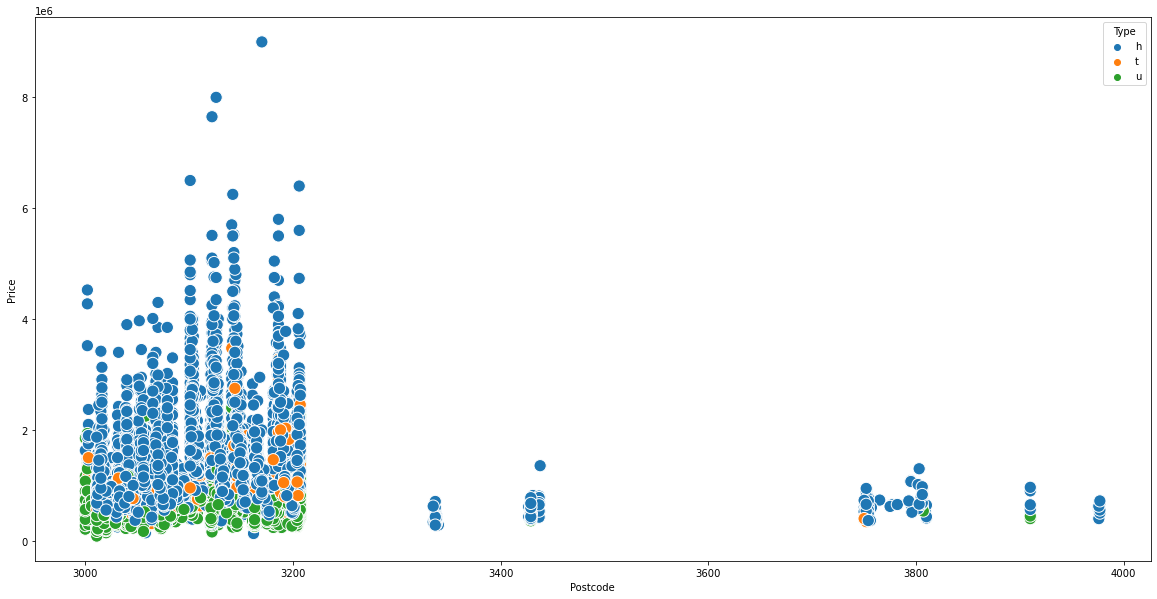

In [30]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="Postcode", y="Price", hue = "Type", data=df, s=150)

Now, let's plot only the points we isolated.

<AxesSubplot:xlabel='Postcode', ylabel='Price'>

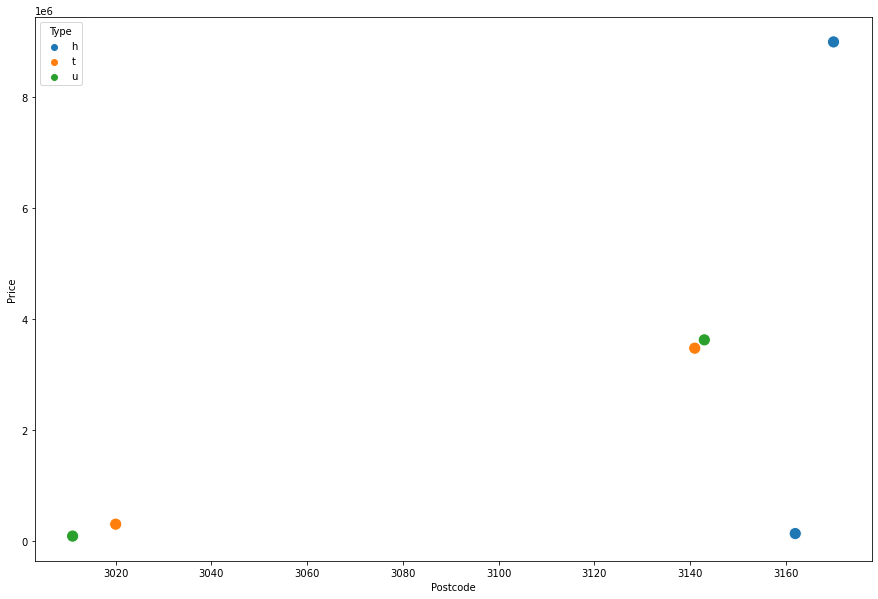

In [31]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="Postcode", y="Price", hue = "Type", data=fullData, s = 150)

From this information we can see that the three most expensive and least expensive postcodes, one for each type of property. The visualization of this information suggests that the most expensive postcodes for each type of property fall from about 3140 to about 3180.<br><br> Interestingly enough, in our last graph we saw that there were lots of other postcode values in our dataset. However, this small range of postcodes contains all of the least expensive and all of the most expensive properties; the most expensive and least expensive of each type of property can be found in the area encompassed by less than a quarter of our dataset's possible postcode range.

## Question 3: How similar are prices per region?

Let's first look at how similar the prices of houses in each region are.

Text(0.5, 1.0, 'Violin Example')

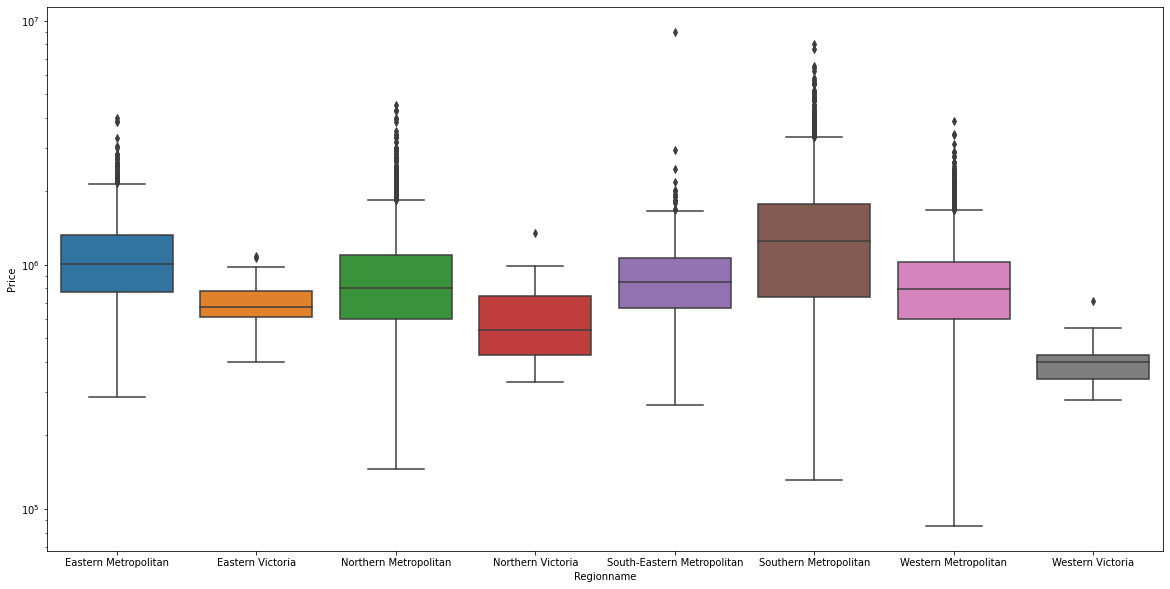

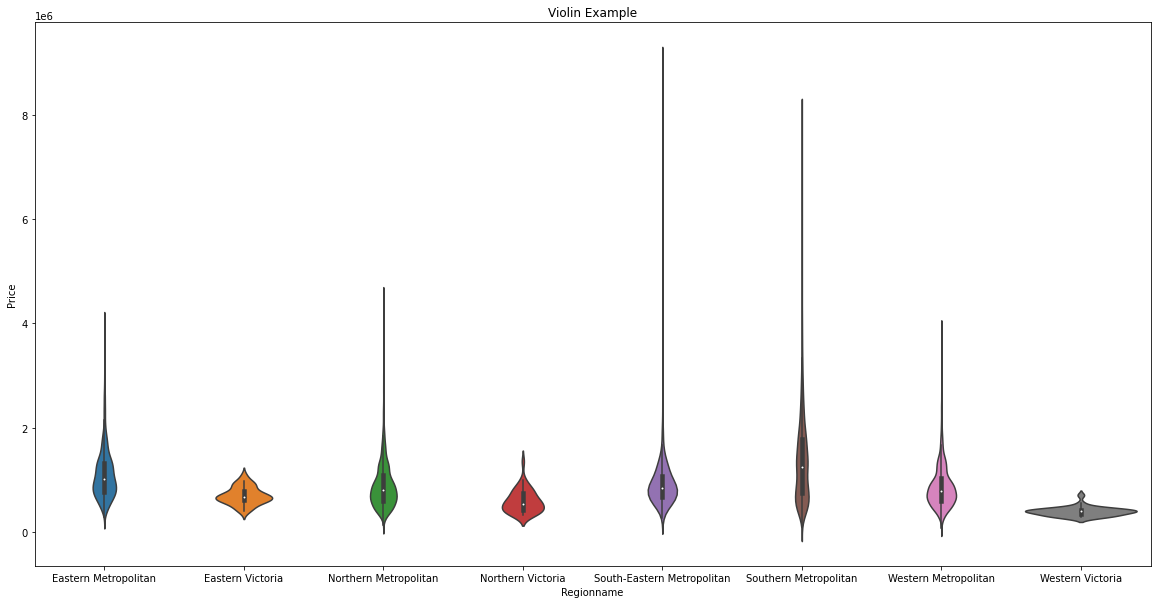

In [32]:
plt.figure(figsize=(20, 10))
tempPlt = sns.boxplot(data=df, x = "Regionname", y = "Price")
tempPlt.set_yscale('log')


plt.figure(figsize=(20, 10))
sns.violinplot(x="Regionname", y="Price", data=df)
plt.title('Violin Example')

Here, we can see that the Victoria regions (Eastern, Northern, and Western Victoria) have a smaller distribution and range with few outliers. Conversely the Metropolitan regions (Northern, Western, Southern, and Eastern, and South-Eastern Metropolitan) have a much larger distribution and range. In this dataset, houses within Victoria regions have similar prices as other houses within the same region, but houses within the Metropolitan regions have less similar prices.

After seeing these distributions, we also wondered if the more similar regions also had more similar numbers of rooms.

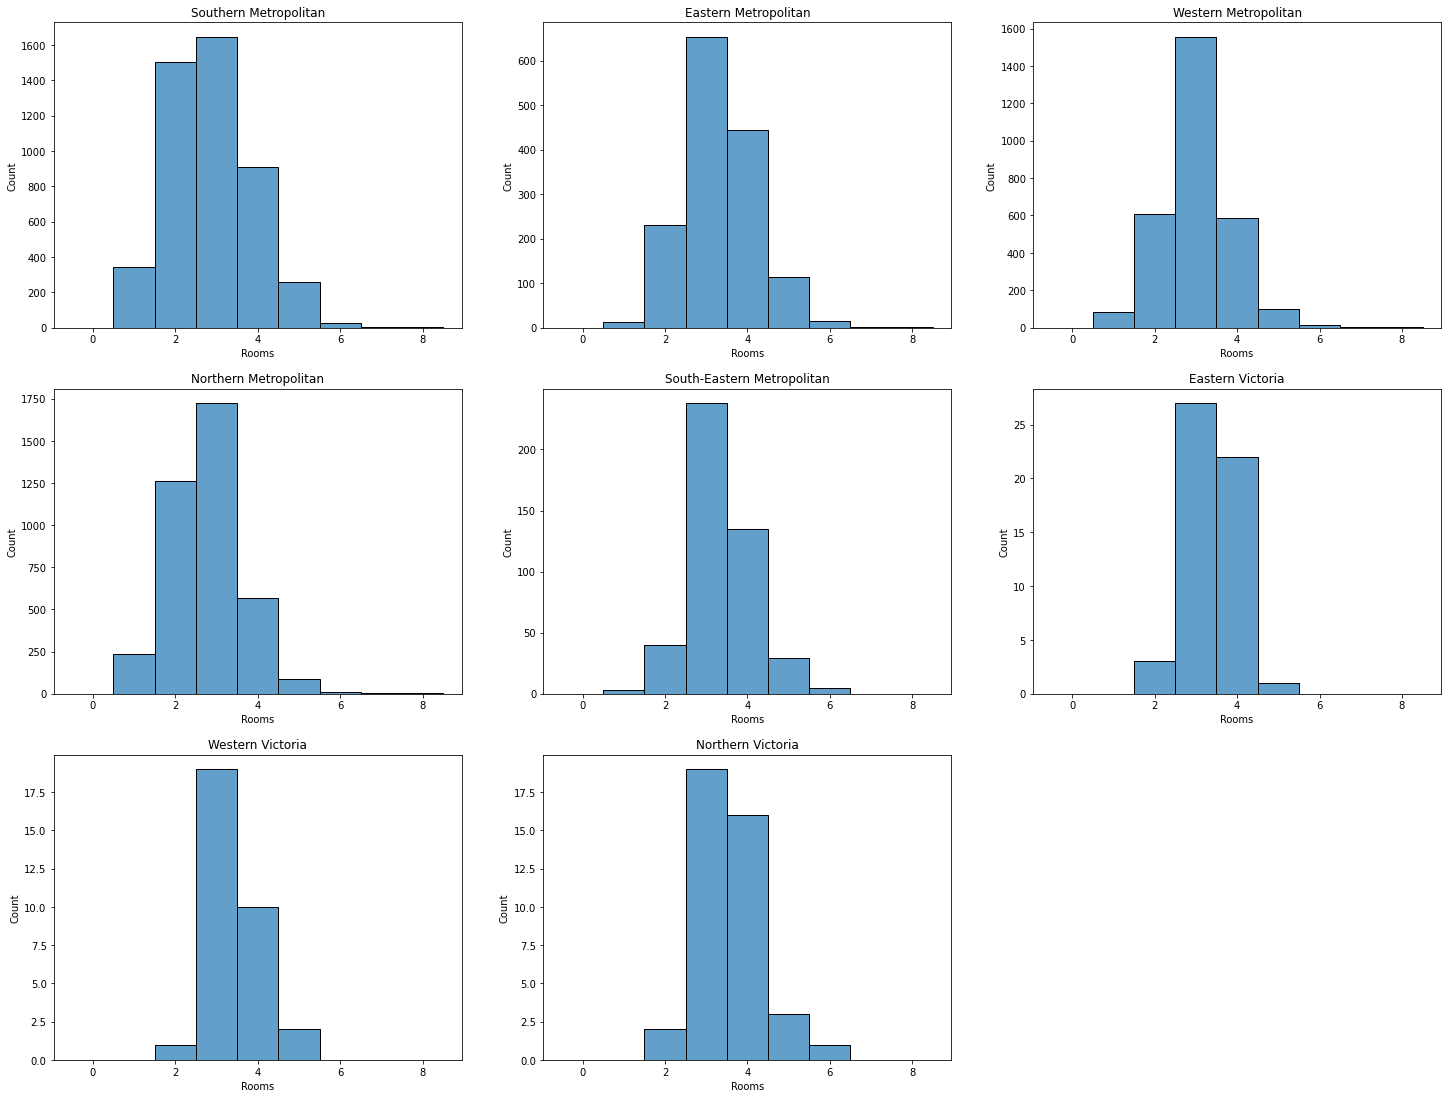

In [33]:
df_regions = df['Regionname'].unique()
count = 0

plt.subplots(figsize=(20, 15))
plt.tight_layout()

for i in df_regions:
    df_plot = df[df['Regionname'] == i]
    plt.subplot(3,3,count+1)
    
    sns.histplot(data = df_plot
                ,x = 'Rooms'
                ,alpha = .7
                 ,discrete = True
                 ,binrange= (0,8)
                 ,binwidth= 1
                ).set(title=i)
    
    count +=  1

Here, we can that again, all of the Victoria regions have a smaller range than the Metropolitan regions. All of the houses range from having 2 to 5 rooms, excluding the one instance of a 6 bedroom room in Northern Victoria. For all three regions, a large majority of housing fall under 3 to 4 rooms. In the Metropolitan regions, the majority of houses also have 3 rooms, but there is a larger range of rooms for each of the Metropolitan regions.

Overall, it seems that Victoria regions are have more similar features than houses in the Metropolitan area.

# 4. Exceptional Work: UMAP

Uniform Manifold Approximation and Projection (aka UMAP) is a method of dimensionality reduction. This method is similar to that of the t-SNE, but is much faster and can be used for non-linear dimenionality reduction. UMAP's claim to fame is its speed and power, with the method handling high dimensional data much faster than t-SNE. Perhaps the most important part of UMAP is its focus on maintaining the global structure of data. <br><br>UMAP functions by first creating a high-dimensional graph of the data, and then creates a second lower dimensional graph that has a layout optimized to be as similar to the original graph as possible. This reduction is possible due to UMAP's creation of a "fuzzy simplical complex." This can be described as a graph bearing different weights based on each point's distance from its nearest neighbor (represented by a radius). As the radius between points grows, the likelihood that they are connected decreases, and the radii grow 'fuzzy,' AKA the algorithm considers them to not be as related. <br><br>In order to preserve a general sense of locality, each point must be connected at least to its closest neighbor. This helps to preserve the local structure while also enabling UMAP to focus on preserving the global structure. <br><br>One drawback of using UMAP is that your data must be uniformly distributed on a Riemannian manifold as the method assumes it is. Additionally, UMAP is not effective at dimensionality reduction when trying to separate a dense cluster from inside of a wider sparse cluster. This is due to UMAP's focus on locality, which makes it difficult to separate that kind of information.<br><br> Information gained from these sources: https://github.com/lmcinnes/umap , https://pair-code.github.io/understanding-umap/

In [ ]:
import umap.umap_
reduction = umap.UMAP(random_state=42)
df_data = df[['Price', 'Rooms', 'Distance', 'Postcode', 'Bathroom', 'Landsize']].values
#df_data = df
#df_data
reduction.fit(df_data)

#scaled_df = StandardScaler().fit_transform(df_data)

In [ ]:
#embedding = reduction.fit_transform(scaled_df)
embedding = reduction.transform(df_data)
# asert(np.all(embedding == reduction.embedding_))
embedding.shape

In [ ]:
plt.scatter(embedding[:,0], embedding[:, 1],c=[sns.color_palette()[x] for x in df.Type.map({"h":0, "t":1, "u":2})])
#plt.gca().set_aspect('equal', 'datalim')
plt.gca().set_aspect('equal', 'datalim')

Due to the dense nature of our data (clustering around similar postcodes, prices, etc) it is likely that UMAP will have a difficult time separating data into different clusters. This falls into the drawbacks mentioned in the explanation of UMAP. However, it is interesting to see what UMAP looks like applied to our dataset. Another form of dimensionality reduction would likely be a better fit, such as Randomized PCA. 